In [ ]:
!pip install koreanize_matplotlib

In [ ]:
import koreanize_matplotlib

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터셋 (커피 원두 - 아라비카, 로부스타의 평가)
- 데이터출처: https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi/data
- 커피상식 : https://yunslee.tistory.com/52 (아라비카와 로부스타의 차이점)  
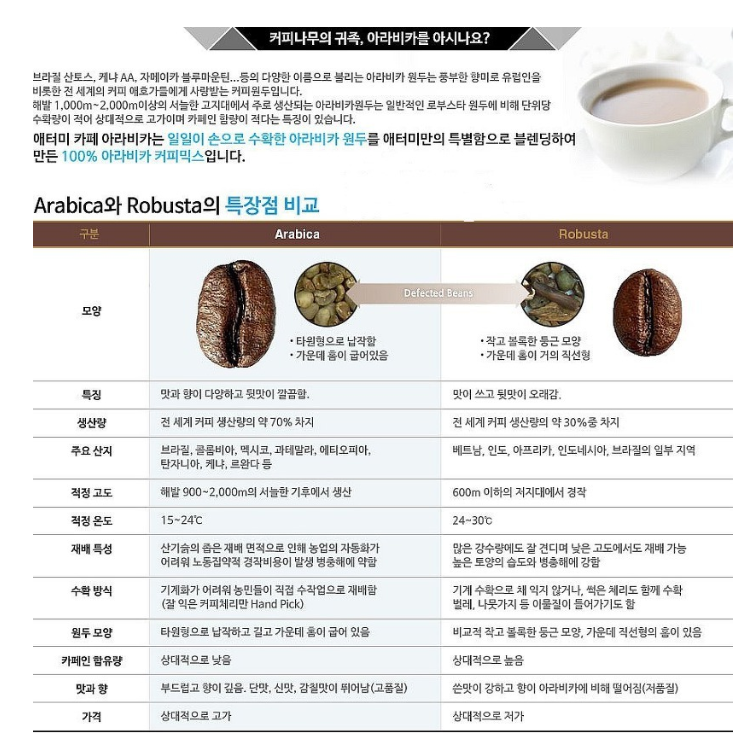

- 커피 원두의 품질을 평가하는 걸로 목표잡고 시작~

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ICTStudy/ML/data/merged_data_cleaned.csv', index_col=0)
data.head(3)

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0


In [ ]:
# 컬럼 확인
data.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

# 데이터의 컬럼 분석
1. **Species**: 커피의 종 (예: Arabica, Robusta).
2. Owner: 커피를 소유한 사람이나 회사의 이름.
3. Country.of.Origin: 커피가 재배된 국가.
4. Farm.Name: 커피가 재배된 농장의 이름.
5. Lot.Number: 특정 커피 배치의 번호.
6. Mill: 커피를 처리하는 공장의 이름.
7. ICO.Number: 국제 커피 기구(International Coffee Organization)의 번호.
8. Company: 커피와 관련된 회사 이름.
9. Altitude: 커피 재배지의 고도.
10. Region: 커피가 재배된 지역.
11. Producer: 커피 생산자.
12. Number.of.Bags: 커피 자루의 수.
13. Bag.Weight: 한 자루의 무게.
14. In.Country.Partner: 해당 국가 내의 협력자.
15. Harvest.Year: 커피 수확 연도.
16. Grading.Date: 커피 등급이 매겨진 날짜.
17. Owner.1: 또 다른 소유자 (다른 주인).
18. Variety: 커피의 품종.
19. Processing.Method: 커피 처리 방법 (예: Washed, Natural).
20. **Aroma**: 커피의 향.
21. **Flavor**: 커피의 맛.
22. **Aftertaste**: 커피의 여운.
23. **Acidity**: 커피의 산미.
24. **Body**: 커피의 바디감.
25. **Balance**: 커피의 밸런스.
26. **Uniformity**: 커피의 균일성.
27. Clean.Cup: 깨끗한 컵.
28. Sweetness: 커피의 단맛.
29. Cupper.Points: 커핑 점수 (커피 테이스팅 전문가가 매긴 점수).
30. **Total.Cup.Points**: 총 컵 점수 (커피 스코어).
31. **Moisture**: 커피의 수분 함량.
32. Category.One.Defects: 1등급 결점의 수.
33. Quakers: 쿼커(불완전한 원두)의 수.
34. Color: 커피 원두의 색상.
35. Category.Two.Defects: 2등급 결점의 수.
36. Expiration: 유통기한.
37. Certification.Body: 인증 기관.
38. Certification.Address: 인증 기관의 주소.
39. Certification.Contact: 인증 기관의 연락처.
40. unit_of_measurement: 측정 단위 (예: kg, lbs).
41. altitude_low_meters: 최소 고도 (미터).
42. altitude_high_meters: 최대 고도 (미터).
43. **altitude_mean_meters**: 평균 고도 (미터).-고도는 재배 기온과 밀접하게 연결,재배지 고도가 높아질수록 산도, 당도, 향미가 증가하는 경향

In [ ]:
# 컬럼명 변경
data = data.rename(columns={'Total.Cup.Points': 'Total_Cup_Points','altitude_mean_meters': 'Altitude_Mean_Meters'})

In [ ]:
# 데이터에서 분석에 필요한 주요 컬럼만 추출
select_columns = ['Total_Cup_Points', 'Aroma', 'Flavor', 'Aftertaste','Acidity','Body', 'Balance', 'Uniformity', 'Moisture', 'Altitude_Mean_Meters']

In [ ]:
data = data[select_columns]
data.head(5)

,Total_Cup_Points,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,Altitude_Mean_Meters
0,90.58,8.67,8.83,8.67,8.75,8.50,8.42,10.0,0.12,2075.0
1,89.92,8.75,8.67,8.50,8.58,8.42,8.42,10.0,0.12,2075.0
2,89.75,8.42,8.50,8.42,8.42,8.33,8.42,10.0,0.00,1700.0
3,89.00,8.17,8.58,8.42,8.42,8.50,8.25,10.0,0.11,2000.0
4,88.83,8.25,8.50,8.25,8.50,8.42,8.33,10.0,0.12,2075.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1339 entries, 0 to 1338
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total_Cup_Points      1339 non-null   float64
 1   Aroma                 1339 non-null   float64
 2   Flavor                1339 non-null   float64
 3   Aftertaste            1339 non-null   float64
 4   Acidity               1339 non-null   float64
 5   Body                  1339 non-null   float64
 6   Balance               1339 non-null   float64
 7   Uniformity            1339 non-null   float64
 8   Moisture              1339 non-null   float64
 9   Altitude_Mean_Meters  1109 non-null   float64
dtypes: float64(10)
memory usage: 115.1 KB


In [ ]:
# 결측치 확인
data.isnull().sum()

Total_Cup_Points          0
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Moisture                  0
Altitude_Mean_Meters    230
dtype: int64

In [ ]:
# Nan 처리
data = data.dropna().reset_index(drop=True)

In [ ]:
data.isnull().sum()

Total_Cup_Points        0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Moisture                0
Altitude_Mean_Meters    0
dtype: int64

### 데이터 전처리(수치형 컬럼 전처리)

In [ ]:
# 수치형 컬럼의 값들의 분포를 확인
data.describe()

,Total_Cup_Points,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,Altitude_Mean_Meters
count,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000,1109.000000
mean,82.109594,7.570577,7.520694,7.394436,7.529152,7.506736,7.505762,9.867872,0.092047,1775.030545
std,3.602429,0.383663,0.400434,0.405722,0.385957,0.366558,0.419186,0.521103,0.045490,8668.626080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,81.170000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,0.100000,1100.000000
50%,82.500000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,0.110000,1310.640000
75%,83.580000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,0.120000,1600.000000
max,90.580000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,0.200000,190164.000000


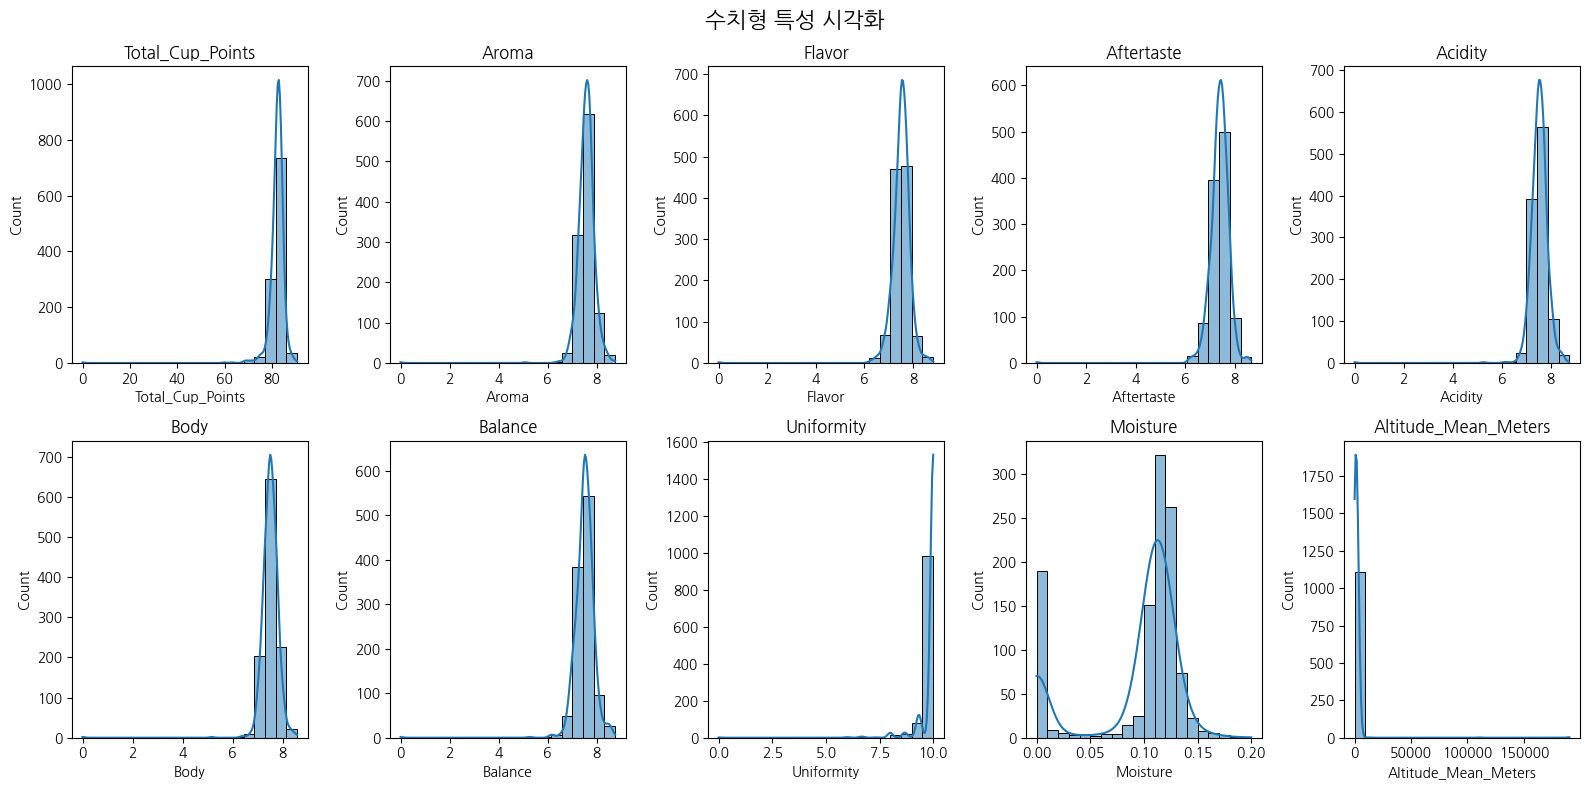

In [ ]:
# 시각화할 수치형 열 리스트
numerical_columns = ['Total_Cup_Points', 'Aroma' ,'Flavor' ,'Aftertaste' ,'Acidity', 'Body','Balance' ,'Uniformity' ,'Moisture', 'Altitude_Mean_Meters']

# 서브플롯 생성
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))
fig.suptitle("수치형 특성 시각화", fontsize=16)

# 수치형 열을 반복하면서 히스토그램 생성
for i, column in enumerate(numerical_columns):
    sns.histplot(data[column], bins=20, kde=True, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(column)

# 레이아웃 조정
plt.tight_layout()
plt.show()

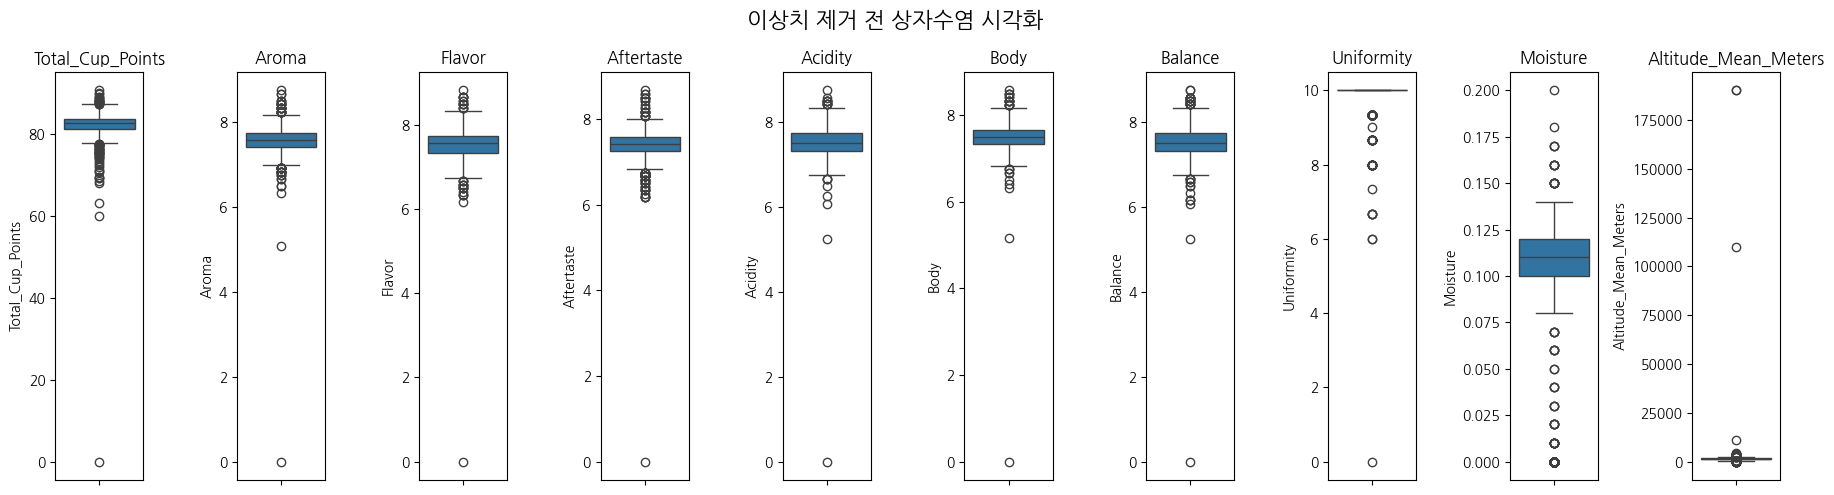

In [ ]:
# 수치형 열 리스트의 이상치 확인
fig , axes = plt.subplots(nrows=1, ncols = len(numerical_columns), figsize=(18,5))
fig.suptitle('이상치 제거 전 상자수염 시각화', fontsize=16)

for i, col in enumerate(numerical_columns):
  sns.boxplot(data=data, y=col, ax=axes[i])
  axes[i].set_title(col)

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [ ]:
# 이상치(아웃라이어) 제거 함수 정의
def remove_outliers_iqr(data, columns):
    replace_outliers_count = {}

    for column in columns:
        # 1사분위수(Q1) 및 3사분위수(Q3) 계산
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)

        # IQR 계산 (Q3 - Q1)
        IQR = Q3 - Q1

        # 경계선 = Qn +- 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # 이전 아웃라이어 개수
        outliers_before = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()

        # 아웃라이어를 경계값으로 대체
        data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

        # 이후 아웃라이어 개수 (이후 아웃라이어는 없을 것으로 예상)
        outliers_after = ((data[column] < lower_bound) | (data[column] > upper_bound)).sum()

        replace_outliers_count[column] = outliers_before - outliers_after

    return data, replace_outliers_count

In [ ]:
# 함수 호출하여 이상치 제거하고 다시 기존 data에 저장
data, replace_outliers_count = remove_outliers_iqr(data, numerical_columns)

# 이상치가 대체된 열의 아웃라이어 개수 출력
print(replace_outliers_count)

{'Total_Cup_Points': 63, 'Aroma': 57, 'Flavor': 31, 'Aftertaste': 64, 'Acidity': 20, 'Body': 26, 'Balance': 37, 'Uniformity': 124, 'Moisture': 238, 'Altitude_Mean_Meters': 66}


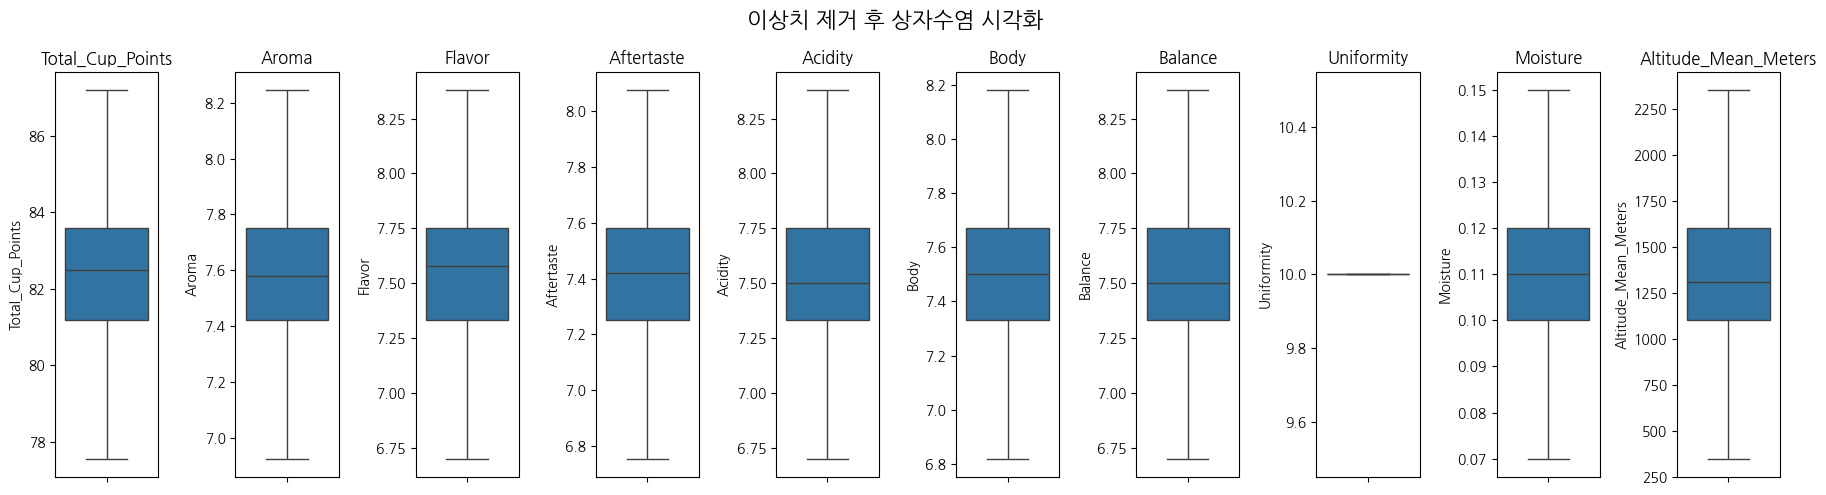

In [ ]:
# 이상치 제거 시각화
fig , axes = plt.subplots(nrows=1, ncols = len(numerical_columns), figsize=(18,5))
fig.suptitle('이상치 제거 후 상자수염 시각화', fontsize=16)

for i, col in enumerate(numerical_columns):
  sns.boxplot(data=data, y=col, ax=axes[i])
  axes[i].set_title(col)

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [ ]:
data

,Total_Cup_Points,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,Altitude_Mean_Meters
0,87.195,8.245,8.38,8.075,8.38,8.18,8.38,10.0,0.12,2075.0
1,87.195,8.245,8.38,8.075,8.38,8.18,8.38,10.0,0.12,2075.0
2,87.195,8.245,8.38,8.075,8.38,8.18,8.38,10.0,0.07,1700.0
3,87.195,8.170,8.38,8.075,8.38,8.18,8.25,10.0,0.11,2000.0
4,87.195,8.245,8.38,8.075,8.38,8.18,8.33,10.0,0.12,2075.0
...,...,...,...,...,...,...,...,...,...,...
1104,80.170,7.670,7.67,7.500,7.33,7.58,7.50,10.0,0.07,750.0
1105,80.170,7.580,7.42,7.420,7.83,7.42,7.50,10.0,0.07,750.0
1106,79.330,7.920,7.50,7.420,7.42,7.42,7.42,10.0,0.07,2350.0
1107,78.080,7.500,7.67,7.750,7.75,6.82,6.70,10.0,0.07,350.0


# 데이터 전처리(Total.Cup.Points 컬럼 범주화)
- 데이터 유형이 'float64' => 연속적인 실수값 데이터 (연속형 데이터)
- 분류모델은 범주형 데이터로 적용해야함
- Total.Cup.Points 컬럼 범주화하여 원두 등급으로 변환

In [ ]:
# Total_Cup_Points 컬럼 확인
data['Total_Cup_Points'].describe()

count    1109.000000
mean       82.309608
std         2.039806
min        77.555000
25%        81.170000
50%        82.500000
75%        83.580000
max        87.195000
Name: Total_Cup_Points, dtype: float64

<Axes: xlabel='Total_Cup_Points', ylabel='Count'>

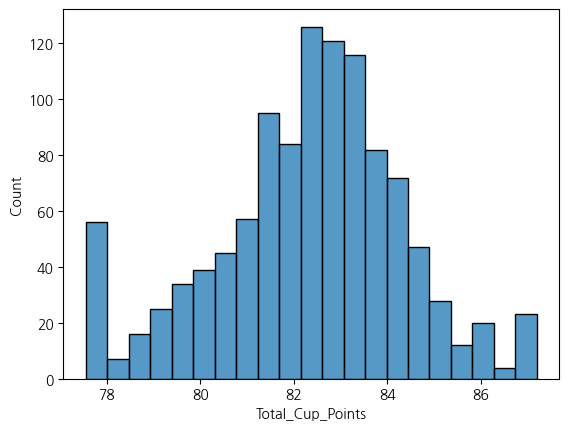

In [ ]:
# Total.Cup.Points 컬럼의 데이터 분포 확인
sns.histplot(data['Total_Cup_Points'])

#### 아라비카 원두는 실제로 아래와 같이 3개의 등급으로 나뉜다고 함.
- 스페셜티 등급(Specialty Grade): 매우 높은 품질의 원두로 평가 점수가 80점 이상
- 프리미엄 등급(Premium Grade): 우수한 품질의 원두로 평가 점수가 75-80점 사이
- 상업용 등급(Commercial Grade): 품질이 보통 수준이며 점수는 75점 미만


#### 따라서 원두의 등급을 3개의 등급으로 정의해 보겠음
- 1등급(스페셜티 등급): 83.58점 이상 (상위 25%)
- 2등급(프리미엄 등급): 82.50 이상 83.58점 미만
- 3등급(상업용 등급): 82.50 미만 (하위 25%)

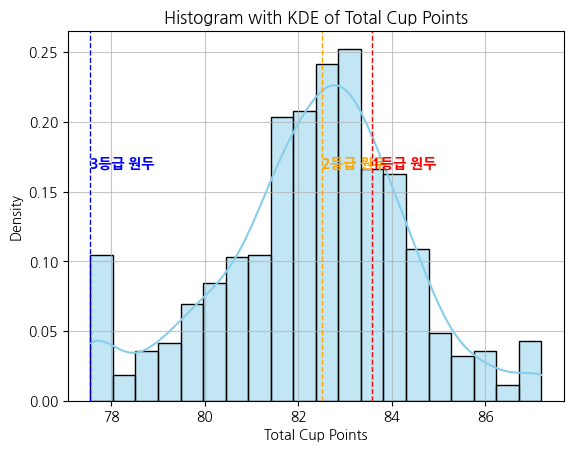

In [ ]:
# data['Total Cup Points'].describe()
# count    1109.000000
# mean       82.309608
# std         2.039806
# min        77.555000
# 25%        81.170000
# 50%        82.500000
# 75%        83.580000
# max        87.195000

# 히스토그램 생성
sns.histplot(x=data['Total_Cup_Points'], bins=20, kde=True, color='skyblue', stat='density')
plt.title('Histogram with KDE of Total Cup Points')
plt.xlabel('Total Cup Points')
plt.ylabel('Density')

# 분위수 값 지정
q1 = 77.555000
q2 = 82.500000
q3 = 83.580000

# 각 분위수에 등급 표시
plt.text(q1, 0.17, '3등급 원두', verticalalignment='center', color='blue', weight='bold')
plt.text(q2, 0.17, '2등급 원두', verticalalignment='center', color='orange', weight='bold')
plt.text(q3, 0.17, '1등급 원두', verticalalignment='center', color='red', weight='bold')

# 각 등급에 대한 경계선 표시
plt.axvline(q1, color='blue', linestyle='--', linewidth=1)
plt.axvline(q2, color='orange', linestyle='--', linewidth=1)
plt.axvline(q3, color='red', linestyle='--', linewidth=1)

# 플롯 표시
plt.grid(True, alpha=0.7)
plt.show()

In [ ]:
y = data['Total_Cup_Points']

In [ ]:
# rating_pctile 계산(데이터 분포에 따라 하위 50%, 상위 25%)
rating_pctile = np.percentile(data['Total_Cup_Points'], [50,75])

In [ ]:
Bean_Grade = [1,2,3]
# 75번째 백분위수보다 높은 등급을 1로 설정
# y = np.where(y > rating_pctile[1], 1, y)
# 50번째 백분위수 이상, 75번째 백분위수 이하의 등급을 2로 설정
# y = np.where((y >= rating_pctile[0]) & (y <= rating_pctile[1]), 2, y)
# 50번째 백분위수보다 낮은 등급을 3으로 설정
# y = np.where(y > rating_pctile[0], 3, y)

In [ ]:
# Total.Cup.Points 컬럼을 기준으로 원두의 등급을 할당하는 함수 정의
def assign_bean_grade(point):
    if point > rating_pctile[1]:
        return 1  # 1등급이 가장 높은 점수 (스페셜티 등급)
    elif (point >= rating_pctile[0]) and (point <= rating_pctile[1]):
        return 2  # 2등급이 중간 점수 (프리미엄 등급)
    else:
        return 3  # 3등급이 가장 낮은 점수 (상업용 등급)

# 'Total.Cup.Points' 열의 값에 따라 'bean_grade' 열에 등급 할당
data['Bean_Grade'] = data['Total_Cup_Points'].apply(assign_bean_grade)

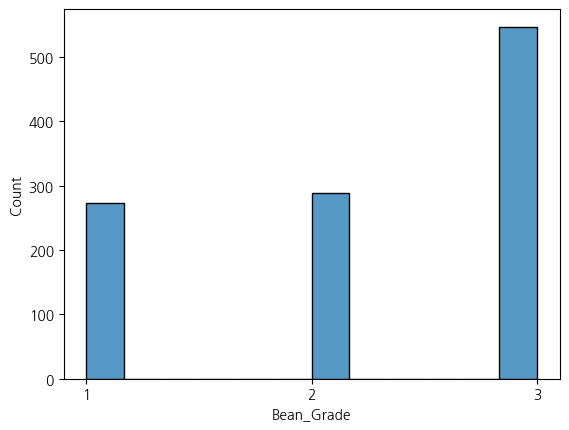

In [ ]:
sns.histplot(data['Bean_Grade'])
plt.xticks(Bean_Grade)
plt.show()

In [ ]:
# data[data['Bean_Grade'] == 1]
# data[data['Bean_Grade'] == 2]
# data[data['Bean_Grade'] == 3]

# KNN 모델 적용

In [ ]:
# X, y 분할
X = data[['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Moisture','Altitude_Mean_Meters']]
y = data['Bean_Grade']

In [ ]:
X.shape, y.shape

((1109, 9), (1109,))

In [ ]:
# X.min(), X.max()

In [ ]:
# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 최적의 k 값 찾기 위한 빈 리스트 생성
train_list = []
test_list = []

# k 값을 1부터 105까지 2씩 증가시키며 반복
for k in range(1, 105, 2):
  # KNeighborsClassifier 모델 인스턴스 생성, n_neighbors 파라미터에 k 값 할당
  model = KNeighborsClassifier(n_neighbors=k)
  # 모델 학습
  model.fit(X_train_scaled, y_train)
  # 학습 데이터 셋에 대한 모델 성능 평가 및 저장
  train_score = model.score(X_train_scaled, y_train)
  test_score = model.score(X_test_scaled, y_test)
  train_list.append(train_score)
  # 테스트 데이터 셋에 대한 모델 성능 평가 및 저장
  test_list.append(test_score)
# 테스트 데이터 셋 성능 중 최댓값 찾기
max_test_score = max(test_list)
# 최댓값에 해당하는 인덱스 찾아 best_k 계산
best_k = (test_list.index(max_test_score)*2) + 1
# 최적의 k 값 출력
print(best_k)

57


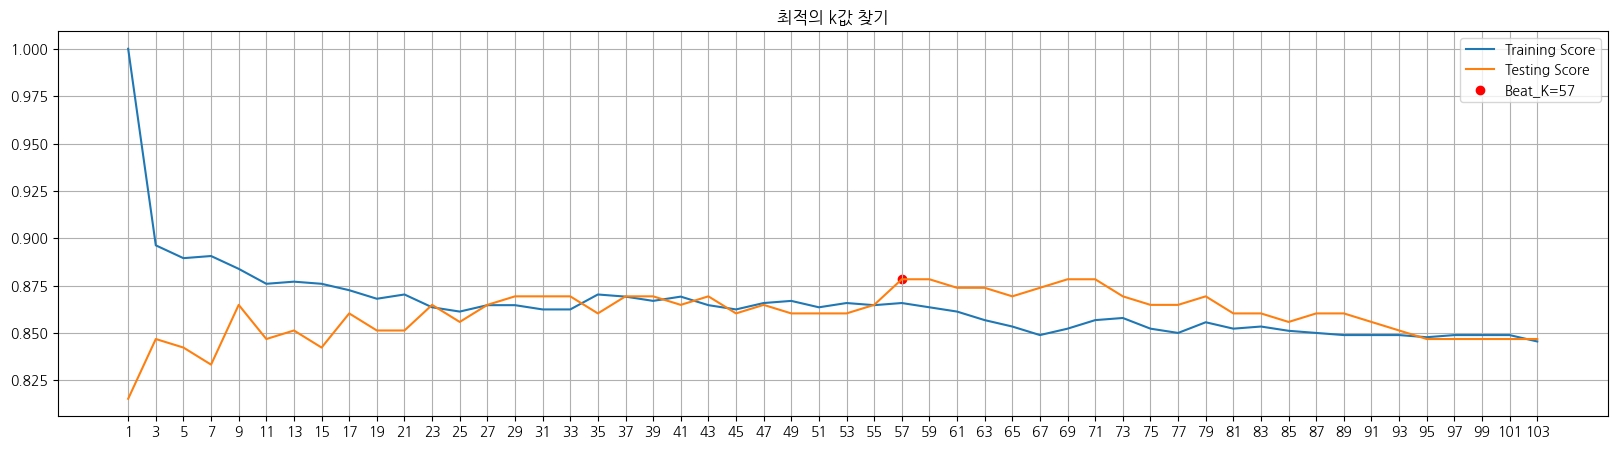

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(range(1, 105, 2), train_list,label="Training Score")
plt.plot(range(1, 105, 2), test_list,label="Testing Score")
plt.scatter(best_k,max_test_score,color='red',label=f'Beat_K={best_k}')
plt.xticks(range(1, 105, 2))
plt.grid()
plt.title('최적의 k값 찾기')
plt.legend()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = best_k)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

In [ ]:
# 테스트 데이터로 모델 성능 평가
# 일반적으로 과대적합이 발생하면 학습 데이터에 대한 정확도는 높지만, 테스트 데이터에 대한 정확도는 상대적으로 낮게 나옴
# 하지만 여기서는 학습 데이터 정확도 0.8658, 테스트 데이터 정확도 0.8784로 테스트 정확도가 오히려 더 높음
# 이는 모델이 데이터의 일반적인 패턴을 잘 학습했음을 의미
# 테스트 데이터에 대해서도 높은 정확도를 보이는 것은 모델의 일반화 성능이 좋다는 뜻
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)
print(f"학습 데이터에서의 정확도: {train_score:.4f}")
print(f"테스트 데이터에서의 정확도: {test_score:.4f}")

학습 데이터에서의 정확도: 0.8658
테스트 데이터에서의 정확도: 0.8784


### 새로운 데이터 넣고 확인해보기

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

def predict_bean_grade(new_data, scaler, model):
    # 데이터 스케일링
    scaled_data = scaler.transform(new_data)
    # 모델을 사용하여 등급 예측
    predicted_grade = model.predict(scaled_data)
    return predicted_grade[0]

In [ ]:
 # 새로운 데이터 (1등급 원두 데이터)
new_data = [[8.245, 8.38,	8.075,	8.38,	8.18,	8.38,	10.0,	0.12,	2075.00]]
# 등급 예측
predicted_grade = predict_bean_grade(new_data, scaler, knn)
print(f'예측된 원두 등급: {predicted_grade} 등급의 원두')

예측된 원두 등급: 1 등급의 원두


In [ ]:
# 새로운 데이터2(2등급 원두 데이터)
new_data2 = [[7.580,7.67,	7.58,	7.58,	7.67,	7.58,	10.0,	0.11,	890.0000]]
# 등급 예측
predicted_grade = predict_bean_grade(new_data2, scaler, knn)
print(f'예측된 원두 등급: {predicted_grade} 등급의 원두')

예측된 원두 등급: 2 등급의 원두


In [ ]:
# 새로운 데이터3(3등급 원두 데이터)
new_data3 = [[7.420,	7.67, 7.17,	7.58,	7.58,	7.50,	10.0,	0.12,	1500.0]]

# 등급 예측
predicted_grade = predict_bean_grade(new_data3, scaler, knn)

print(f'예측된 원두 등급: {predicted_grade} 등급의 원두')

예측된 원두 등급: 3 등급의 원두


# 앙상블  
- 로지스틱 회귀, KNN, 결정 트리 분류기를 Soft Voting 방식으로 결합한 VotingClassifier를 생성하고 학습 및 평가

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# 데이터 스케일링과 모델 학습을 파이프라인으로 구성

# 파이프라인을 사용하여 데이터 스케일링과 로지스틱 회귀 모델을 결합
lr_clf_scaled = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# K-최근접 이웃(KNN) 분류기
knn_clf_scaled = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=best_k))

# 결정 트리 분류기
dtc = DecisionTreeClassifier(max_depth=5)

# Soft Voting 분류기 생성 - 앙상블
vo_clf = VotingClassifier(estimators=[('LR',lr_clf_scaled),('KNN',knn_clf_scaled),('DTC',dtc)], voting='soft')

# coffee_df를 사용하여 X와 y를 분할
X = data[['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Moisture','Altitude_Mean_Meters']]
y = data['Bean_Grade']

# 훈련셋/테스트셋 분할
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Voting 분류기 학습
vo_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('LR',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('logisticregression',
                                               LogisticRegression(max_iter=1000))])),
                             ('KNN',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('kneighborsclassifier',
                                               KNeighborsClassifier(n_neighbors=57))])),
                             ('DTC', DecisionTreeClassifier(max_depth=5))],
                 voting='soft')

In [ ]:
# 테스트 데이터로 예측을 수행하고 정확도를 확인
pred = vo_clf.predict(X_test)
print('Voting 분류기의 정확도 :{0:4f}'.format(accuracy_score(y_test,pred)))

Voting 분류기의 정확도 :0.887387


In [ ]:
# 세 가지 다른 분류기(Logistic Regression, k-Nearest Neighbors, Decision Tree)를 학습하고 각각의 정확도를 테스트 데이터셋에서 평가

# 분류기 리스트
classifiers = [lr_clf_scaled,knn_clf_scaled,dtc]

# 각 분류기별 학습 및 평가
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)

  # 파이프라인의 경우, 최종 모델의 클래스 이름을 가져옴
  if hasattr(classifier,'steps'):
    class_name = classifier.steps[-1][1].__class__.__name__
  else:
    class_name = classifier.__class__.__name__
  print(f'{class_name} 분류기 Accuracy : {accuracy_score(y_test, pred)} \n')

LogisticRegression 분류기 Accuracy : 0.8603603603603603 

KNeighborsClassifier 분류기 Accuracy : 0.8783783783783784 

DecisionTreeClassifier 분류기 Accuracy : 0.8198198198198198 



- 결과를 보면 k-Nearest Neighbors 분류기가 가장 높은 정확도를 보였으며,   
  따라서 이 특정 데이터셋에서는 k-Nearest Neighbors 분류기가 가장 적합한 모델로 평가되었음을 확인함

# 앙상블 모델을 피클파일로 저장

In [ ]:
# model을 save하기
import joblib

path = '/content/drive/MyDrive/Colab Notebooks/ICTStudy/ML/data/'
file_name = f'{path}voting_classifier.pkl'

# 모델 저장
joblib.dump(vo_clf, file_name)

['/content/drive/MyDrive/Colab Notebooks/ICTStudy/ML/data/voting_classifier.pkl']

In [ ]:
# # Django에서~
# # 모델 로드
# loaded_model = joblib.load(file_name)

# # 모델 사용
# y_pred = loaded_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')